In [16]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import json
import random
np.random.seed(42)

In [17]:
gtsrb_labels = {}

with open("./gtsrb-labels.json", "r") as f:
    gtsrb_labels = json.load(f)

In [30]:
# Constants
TRAIN_DATASET_PATH = "dataset/Train"
NUM_CATEGORIES = len(os.listdir(TRAIN_DATASET_PATH))

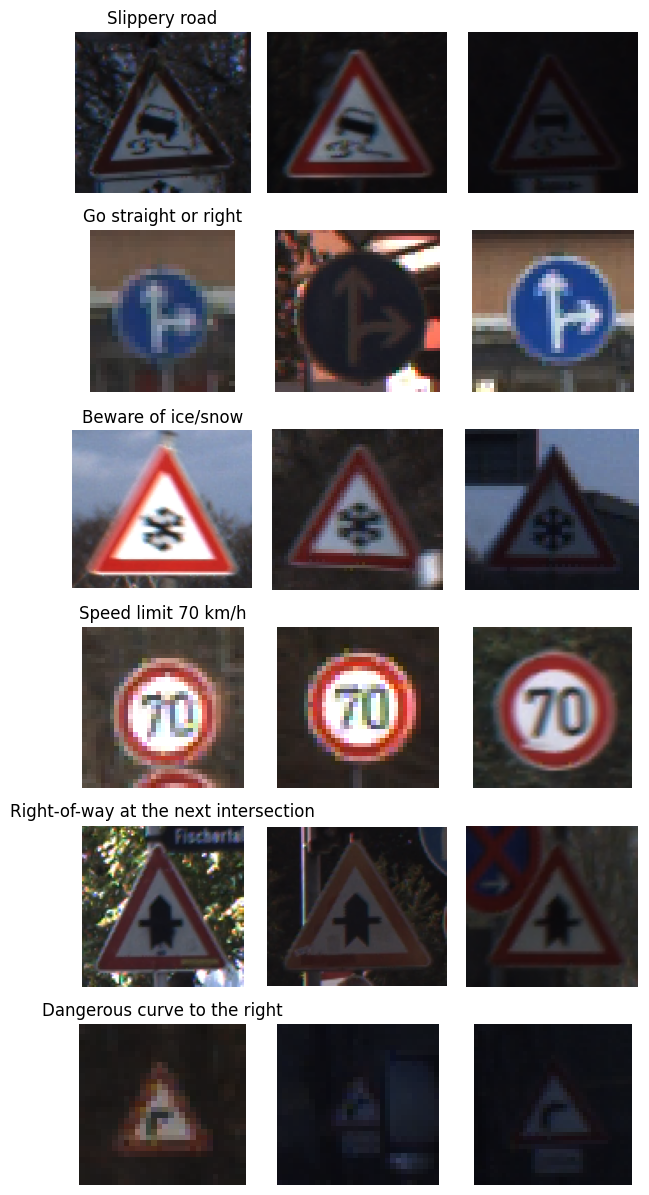

In [19]:
no_of_signs = 6
no_of_img = 3

random_folders = random.sample(os.listdir(TRAIN_DATASET_PATH), no_of_signs)
fig, axes = plt.subplots(no_of_signs, no_of_img, figsize=(no_of_img * 2, no_of_signs * 2))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for i in range(len(random_folders)):
    rand_images = random.sample(os.listdir(f"{TRAIN_DATASET_PATH}/{random_folders[i]}"), no_of_img)
    axes[i, 0].set_title(gtsrb_labels[random_folders[i]], fontsize=12)
    for j in range(len(rand_images)):
        img = rand_images[j]
        ax = axes[i, j]
        ax.imshow(plt.imread(os.path.join(TRAIN_DATASET_PATH, random_folders[i], img)))
        ax.axis("off")


plt.tight_layout()
plt.show()



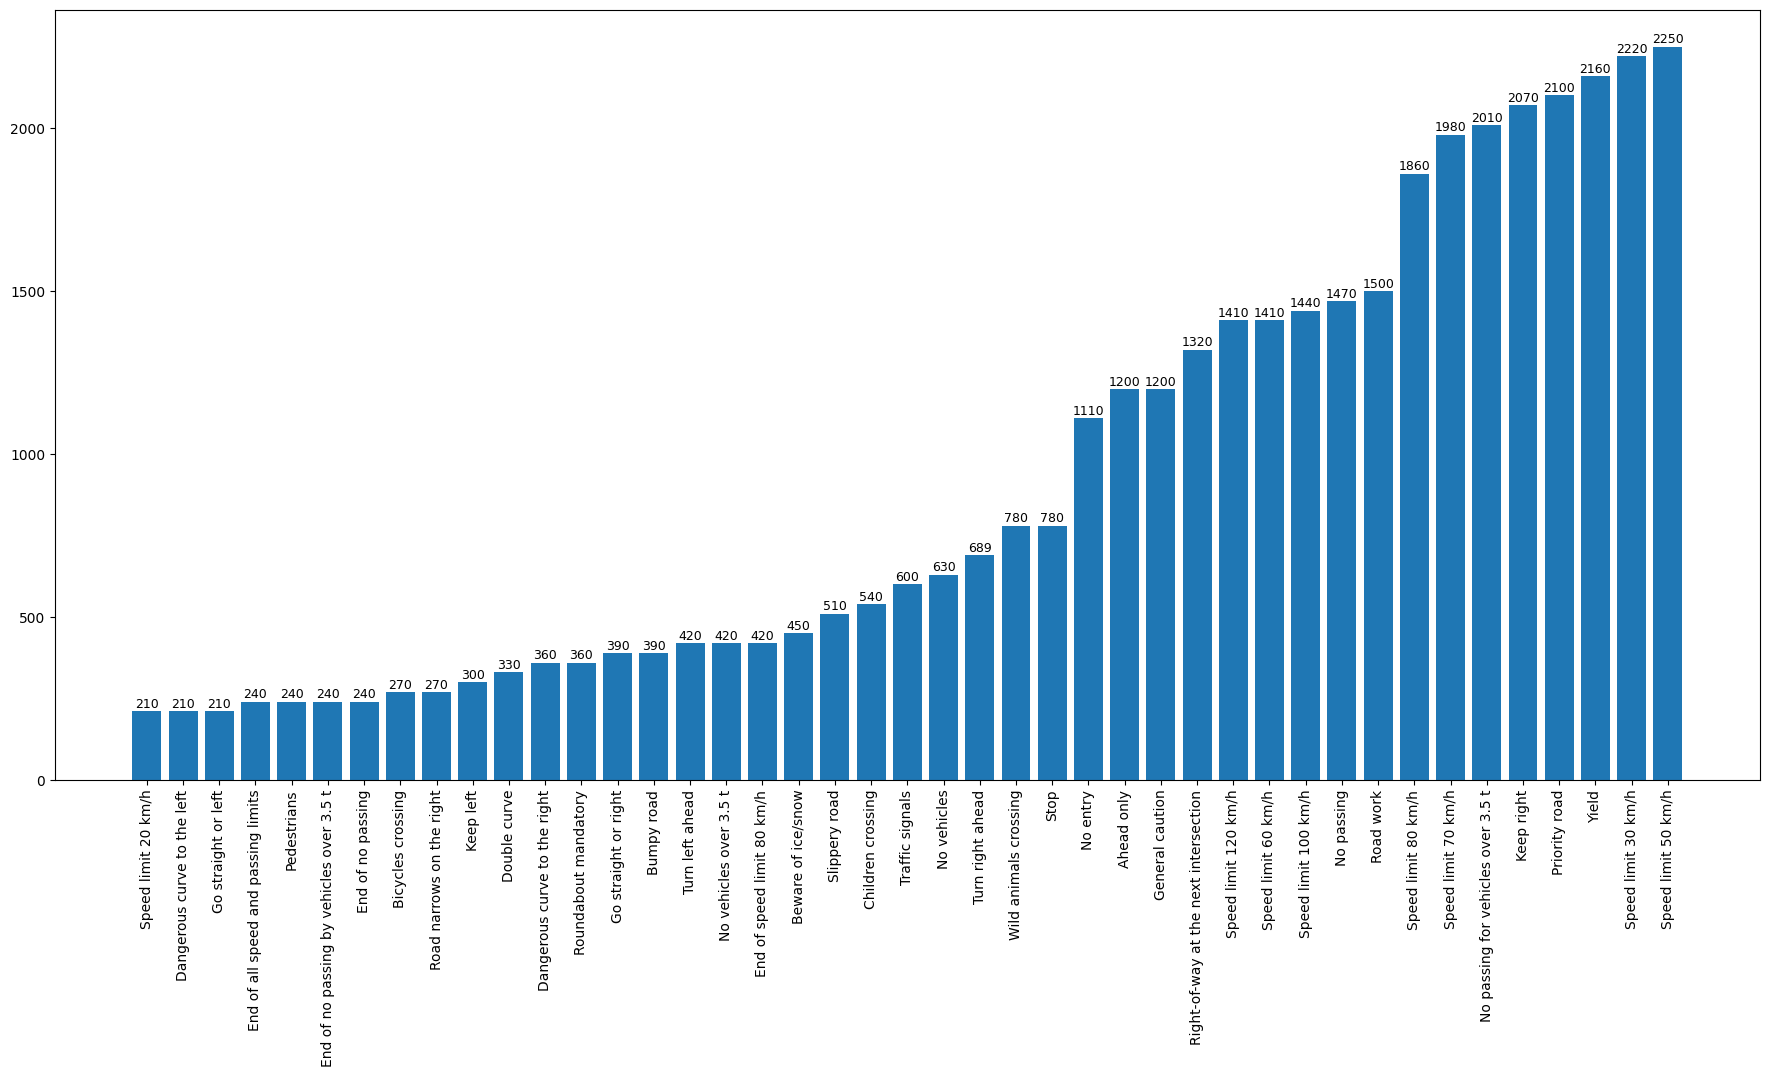

In [20]:
# Visualizing the dataset
sign_counts = {}

for folder in os.listdir(TRAIN_DATASET_PATH):
    sign_files = os.listdir(f"{TRAIN_DATASET_PATH}/{folder}")
    label = gtsrb_labels[folder]
    sign_counts[label] = len(sign_files)

sorted_sign_counts = dict(sorted(sign_counts.items(), key=lambda item: item[1]))
plt.figure(figsize=(22, 10))
bars = plt.bar(x=list(sorted_sign_counts.keys()), height=list(sorted_sign_counts.values()), label=len(list(sorted_sign_counts.values())))
plt.xticks(ticks=list(sorted_sign_counts), rotation="vertical")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(yval), ha='center', va='bottom', fontsize=9)

plt.show()

In [21]:
image_data = []
label_data = []

for folder in os.listdir(TRAIN_DATASET_PATH):
    images = os.listdir(f"{TRAIN_DATASET_PATH}/{folder}")
    for img_path in images:
        try:
            pixels = cv2.imread(f"{TRAIN_DATASET_PATH}/{folder}/{img_path}")
            image_arr = Image.fromarray(pixels, "RGB")
            resized_img = image_arr.resize((30, 30))
            image_data.append(resized_img)
            label_data.append(folder)
        except:
            print("Error occured")

In [22]:
# Shape
image_data = np.array(image_data)
label_data = np.array(label_data)

print("Image data shape:", image_data.shape)
print("Image label shape:", label_data.shape)

Image data shape: (39209, 30, 30, 3)
Image label shape: (39209,)


In [ ]:
# Shuffle data
shuffled_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffled_indexes)
image_data = image_data[shuffled_indexes]
label_data = label_data[shuffled_indexes]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_data, label_data, test_size=0.3, random_state=32, shuffle=True)

In [29]:
# Normalize the data
x_train_norm = x_train / 255
x_test_norm = x_test / 255

print("x_train_nrom.shape", x_train_norm.shape)
print("x_test_norm.shape", x_test_norm.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

x_train_nrom.shape (27446, 30, 30, 3)
x_test_norm.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_test.shape (11763,)


In [32]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_test = keras.utils.to_categorical(y_test, NUM_CATEGORIES)

In [35]:
# Model
model = keras.models.Sequential([    
    keras.layers.Input(shape=(30,30,3)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
hist = model.fit(x_train_norm, y_train, epochs=15, validation_data=(x_test_norm, y_test), shuffle=True, verbose=1)

Epoch 1/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7522 - loss: 1.0054 - val_accuracy: 0.9861 - val_loss: 0.0502
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9856 - loss: 0.0486 - val_accuracy: 0.9870 - val_loss: 0.0442
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9906 - loss: 0.0326 - val_accuracy: 0.9910 - val_loss: 0.0341
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9928 - loss: 0.0246 - val_accuracy: 0.9696 - val_loss: 0.0975
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.9923 - val_loss: 0.0323
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9818 - val_loss: 0.0632
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9921 - loss: 0.0232 - val_accuracy: 0.9906 - val_loss: 0.0358
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9950 - loss: 0.0149 - 

In [37]:
# Evaluate
loss, acc = model.evaluate(x_test_norm, y_test)
print(f"Test Accurary: {acc*100:.2f}%")

368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9857 - loss: 0.0575
Test Accurary: 98.60%


Text(0.5, 1.0, 'Model Accuracy')

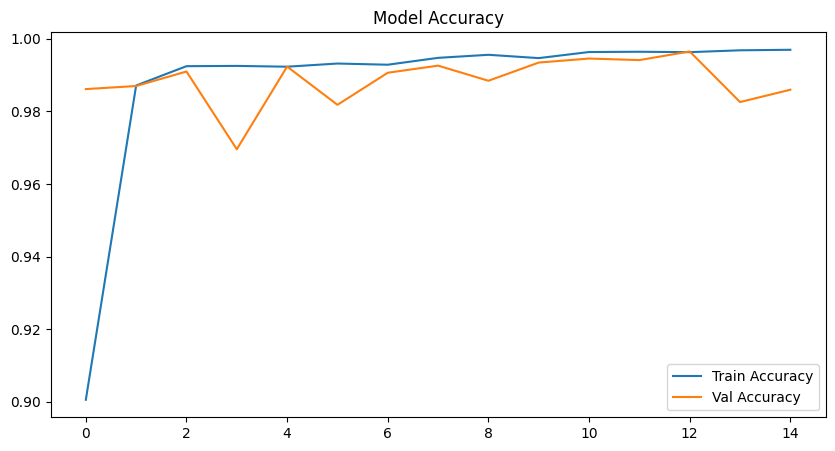

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

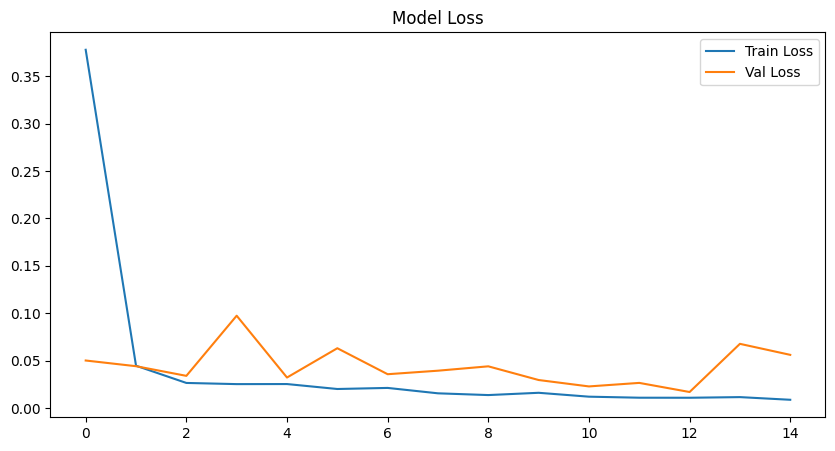

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [44]:
np.argmax(y_test[0])

np.int64(13)

In [50]:
x_test_norm[0].shape

(30, 30, 3)

0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


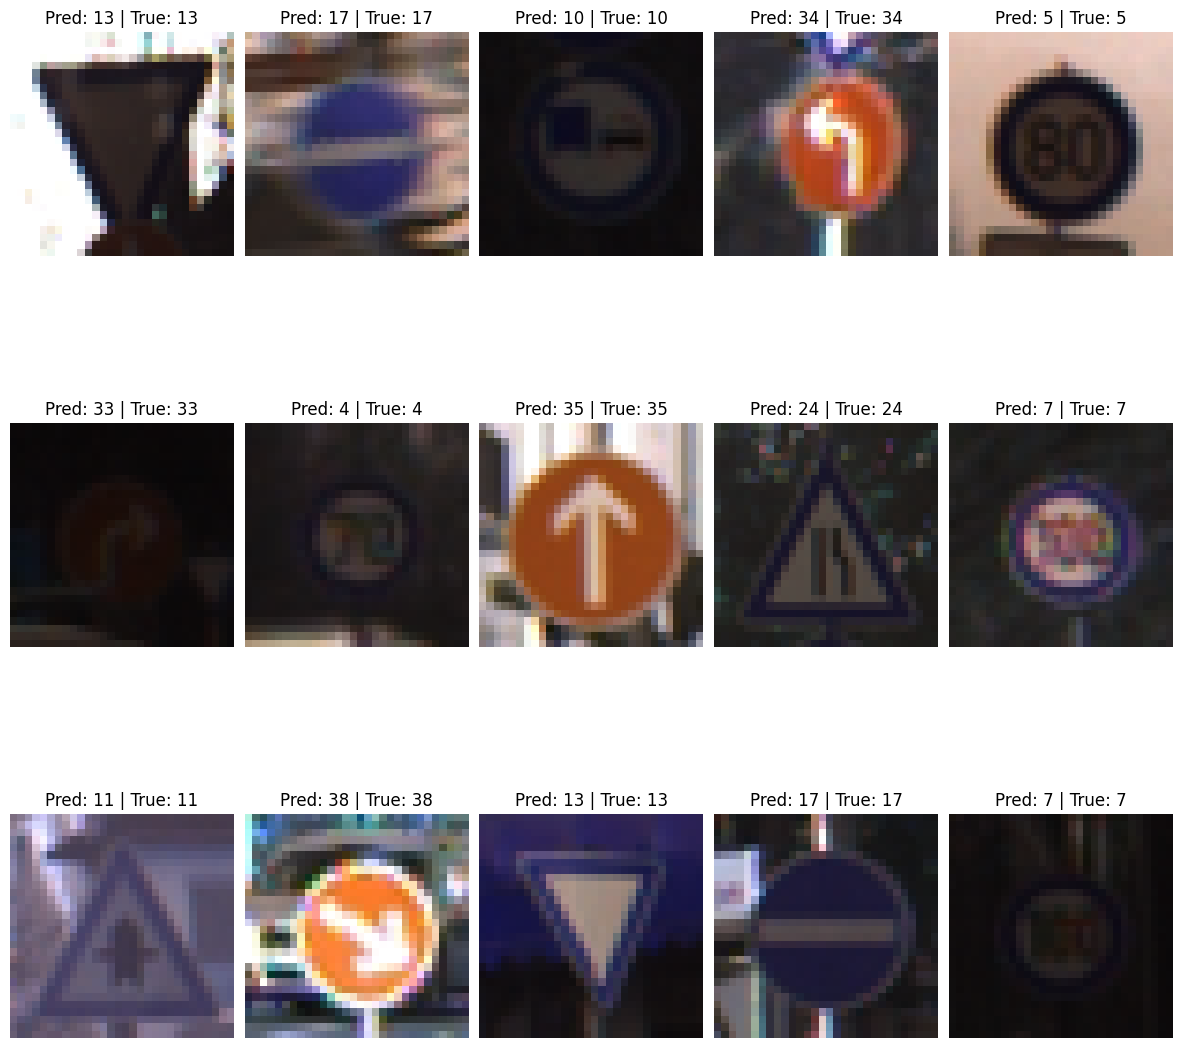

In [55]:

fig, axes = plt.subplots(3, 5, figsize=(15, 15))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
for i, ax in enumerate(axes.flat):
    print(i)
    img = x_test_norm[i]
    true_label = np.argmax(y_test[i])
    pred_label = np.argmax(model.predict(img.reshape(1, 30, 30, 3)))
    ax.imshow(img)
    ax.set_title(f"Pred: {pred_label} | True: {true_label}")
    ax.axis('off')

# plt.tight_layout()
plt.show()



In [57]:
# Saving the Model 
model.save('traffic_classifier.keras')